In [1]:
%pip install pandas numpy seaborn
import pandas as pd
import numpy as np
import seaborn as sns


Note: you may need to restart the kernel to use updated packages.


In [4]:
suicide_df = pd.read_csv(r'E:\41TS\Suicides in India 2001-2012.csv')
suicide_df.head()

,State,Year,Type_code,Type,Gender,Age_group,Total
0,A & N Islands,2001,Causes,Illness (Aids/STD),Female,0-14,0
1,A & N Islands,2001,Causes,Bankruptcy or Sudden change in Economic,Female,0-14,0
2,A & N Islands,2001,Causes,Cancellation/Non-Settlement of Marriage,Female,0-14,0
3,A & N Islands,2001,Causes,Physical Abuse (Rape/Incest Etc.),Female,0-14,0
4,A & N Islands,2001,Causes,Dowry Dispute,Female,0-14,0


In [7]:
#Removing the values from the column 'State' and making new dataframe, 'statewise_df'

statewise_df = suicide_df.drop(suicide_df[(suicide_df.State == 'Total (Uts)') | (suicide_df.State == 'Total (All India)') | 
               (suicide_df.State == 'Total (States)')].index)

In [8]:
statewise_df = statewise_df.drop(statewise_df[statewise_df['Total'] == 0].index)
statewise_df.head()

,State,Year,Type_code,Type,Gender,Age_group,Total
13,A & N Islands,2001,Causes,Love Affairs,Female,0-14,1
20,A & N Islands,2001,Causes,Other Causes (Please Specity),Female,0-14,1
32,A & N Islands,2001,Causes,Other Prolonged Illness,Male,0-14,1
47,A & N Islands,2001,Causes,Failure in Examination,Male,0-14,1
54,A & N Islands,2001,Causes,Other Prolonged Illness,Female,15-29,8


In [9]:
#Renaming the 'Type' which has almost same meaning
statewise_df.replace('Bankruptcy or Sudden change in Economic', 
           'Bankruptcy or Sudden change in Economic Status', inplace=True)
statewise_df.replace('By Other means (please specify)', 'By Other means', inplace=True)
statewise_df.replace('Not having Children(Barrenness/Impotency',
           'Not having Children (Barrenness/Impotency)', inplace=True) 

In [10]:
statewise_df = statewise_df.set_index(pd.Index([i for i in range(0,101110)]))
statewise_df

,State,Year,Type_code,Type,Gender,Age_group,Total
0,A & N Islands,2001,Causes,Love Affairs,Female,0-14,1
1,A & N Islands,2001,Causes,Other Causes (Please Specity),Female,0-14,1
2,A & N Islands,2001,Causes,Other Prolonged Illness,Male,0-14,1
3,A & N Islands,2001,Causes,Failure in Examination,Male,0-14,1
4,A & N Islands,2001,Causes,Other Prolonged Illness,Female,15-29,8
...,...,...,...,...,...,...,...
101105,West Bengal,2012,Social_Status,Seperated,Male,0-100+,149
101106,West Bengal,2012,Social_Status,Widowed/Widower,Male,0-100+,233
101107,West Bengal,2012,Social_Status,Married,Male,0-100+,5451
101108,West Bengal,2012,Social_Status,Divorcee,Male,0-100+,189


In [11]:
import seaborn as sns  #https://seaborn.pydata.org/generated/seaborn.set_style.html
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

sns.set_style('darkgrid')
#We use rc i.e a runtime configuration (rc) containing the default styles for every plot element you create
matplotlib.rcParams['font.size'] = 12
matplotlib.rcParams['figure.figsize'] = (9, 5)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

In [12]:
#Creating a series of total suicides according to year

yearwise_total_suicide = statewise_df.groupby("Year")["Total"].sum()
print('Total number of suicides in each year: ', yearwise_total_suicide)

#plotting this in a line graph
yearwise_total_suicide.plot(kind="line", figsize = (9,5), color = 'r')
plt.title('Yearwise Total Suicides')
plt.xlabel('Year')
plt.ylabel('Number of suicides');

Total number of suicides in each year:  Year
2001    542440
2002    551980
2003    554218
2004    568349
2005    569545
2006    590543
2007    613119
2008    625014
2009    635429
2010    672926
2011    677159
2012    647288
Name: Total, dtype: int64


Total number of suicides in each State :  State
A & N Islands          8109
Andhra Pradesh       814059
Arunachal Pradesh      6633
Assam                172276
Bihar                 46214
Chandigarh             5164
Chhattisgarh         302354
D & N Haveli           3430
Daman & Diu            1391
Delhi (Ut)            84272
Goa                   17363
Gujarat              330858
Haryana              147176
Himachal Pradesh      26562
Jammu & Kashmir       14821
Jharkhand             49720
Karnataka            734825
Kerala               538946
Lakshadweep              50
Madhya Pradesh       451535
Maharashtra          901945
Manipur                2102
Meghalaya              5415
Mizoram                4154
Nagaland               1728
Odisha               267234
Puducherry            32144
Punjab                46350
Rajasthan            255134
Sikkim                 9606
Tamil Nadu           818691
Tripura               45965
Uttar Pradesh        233352
Uttarakhand           18496


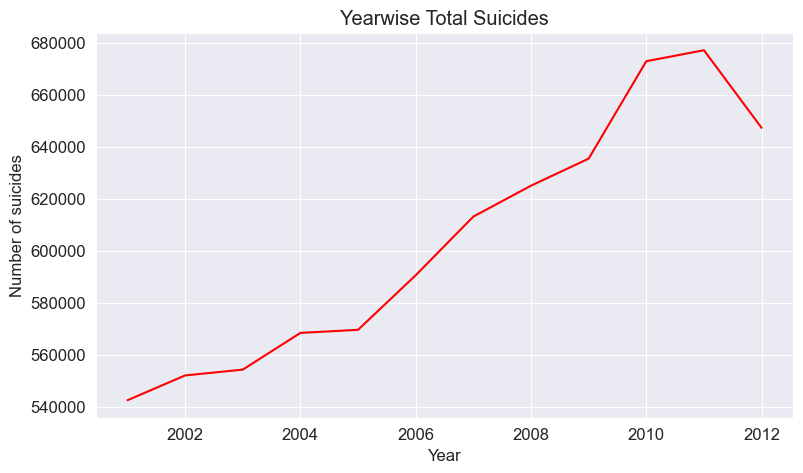

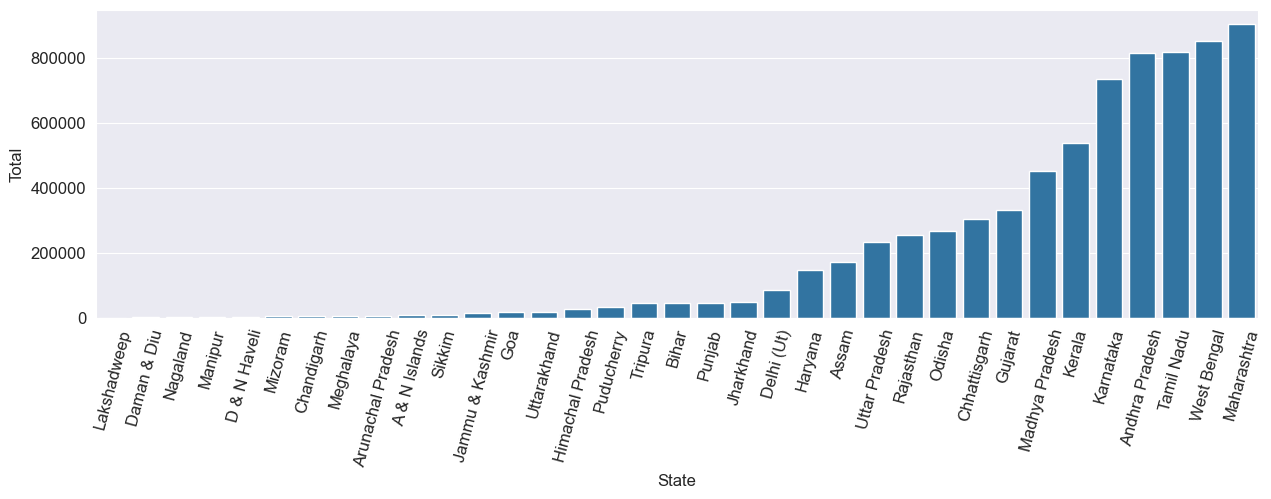

In [13]:
#Creating a series of total suicides on the basis of states
statewise_total_suicide = statewise_df.groupby("State")["Total"].sum()
print('Total number of suicides in each State : ', statewise_total_suicide)

#plotting the above data
filter_state = pd.DataFrame(statewise_total_suicide.reset_index()) 
sort_state = filter_state.sort_values('Total',ascending = True)
f, ax = plt.subplots(figsize=(15, 4))
#sns.barplot(y = 'Total', x = 'State',data = sort_state,edgecolor = '0.5')
sns.barplot(y = 'Total', x = 'State',data = sort_state)
plt.xticks(rotation=75);
plt.show()

In [14]:
#Filtering the data according to 'type_code','Total' and 'Year'
filter_type_code = pd.DataFrame(statewise_df.groupby(["Type_code","Year"])["Total"].sum()).reset_index()

#Plotting the above data
sns.catplot(x="Type_code", y="Total",hue="Year", kind="bar", data=filter_type_code,height=7.5, aspect=10/7.5);
plt.title('Suicide According To Causes In Each Year');

Gender
Male      54841
Female    46269
Name: count, dtype: int64


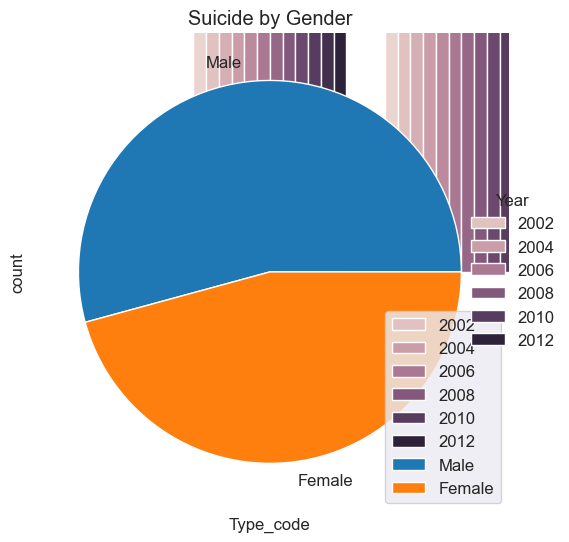

In [15]:
#Gender Suicide Frequency
#counts = statewise_df['Gender'].value_counts().sort_index()
counts = statewise_df['Gender'].value_counts()
print(counts)

# Plot a pie chart
counts.plot(kind='pie', title='Suicide by Gender',figsize=(6,6))
plt.legend()
plt.show()

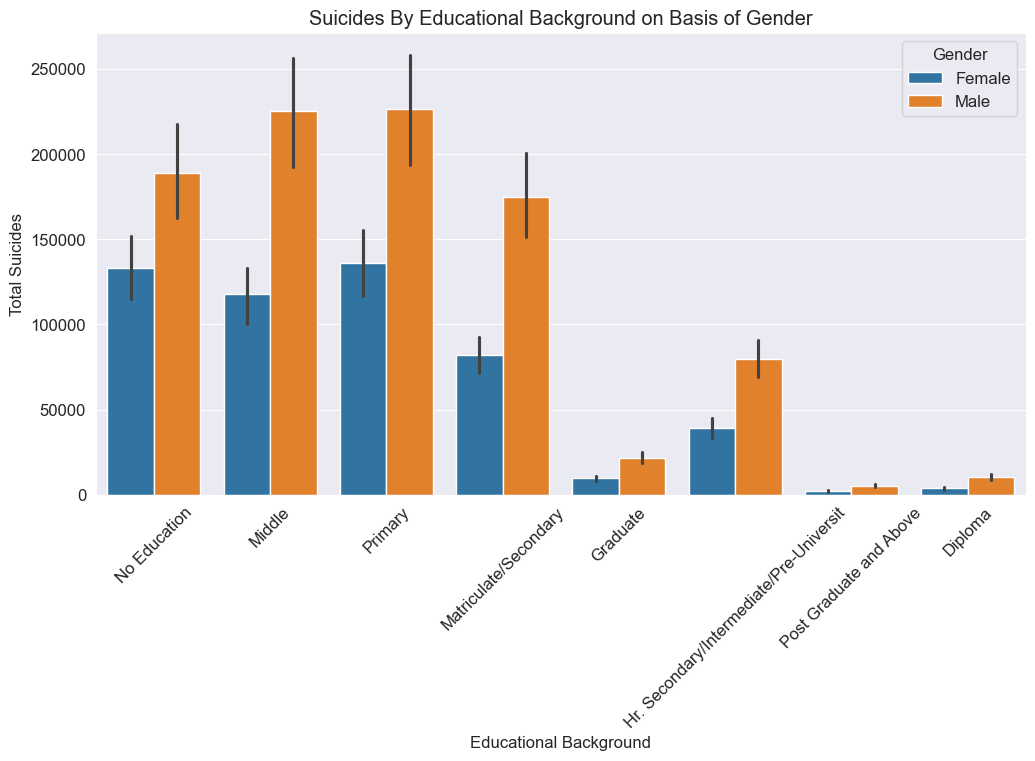

In [16]:
# Filtering the data according to 'Type_code', 'Gender', and 'Total'
education_gender_df = statewise_df[statewise_df['Type_code'] == 'Education_Status']

# Plotting the data
plt.figure(figsize=(12, 6))
sns.barplot(x='Type', y='Total', hue='Gender', data=education_gender_df, estimator=sum)
plt.title('Suicides By Educational Background on Basis of Gender')
plt.xlabel('Educational Background')
plt.ylabel('Total Suicides')
plt.xticks(rotation=45)
plt.show()

In [21]:
#filtering the data as per the educational background
education_status = pd.DataFrame(statewise_df[statewise_df["Type_code"]=="Education_Status"].groupby(["Type","Gender"])["Total"].sum()).reset_index()
education_status

#plotting the above data
g = sns.catplot(y="Type", x="Total",hue="Gender", kind="bar", data=education_status,height=7, aspect=11.7/7);
sns.set_style('whitegrid');

In [ ]:
# Grouping the data by Age_group and summing the Total suicides
age_group_suicide = statewise_df.groupby("Age_group")["Total"].sum()
print('Total number of suicides in each age group: ', age_group_suicide)

# Plotting the data
plt.figure(figsize=(12, 6))
sns.barplot(x=age_group_suicide.index, y=age_group_suicide.values)
plt.title('Suicides by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Total Suicides')
plt.xticks(rotation=45)
plt.show()

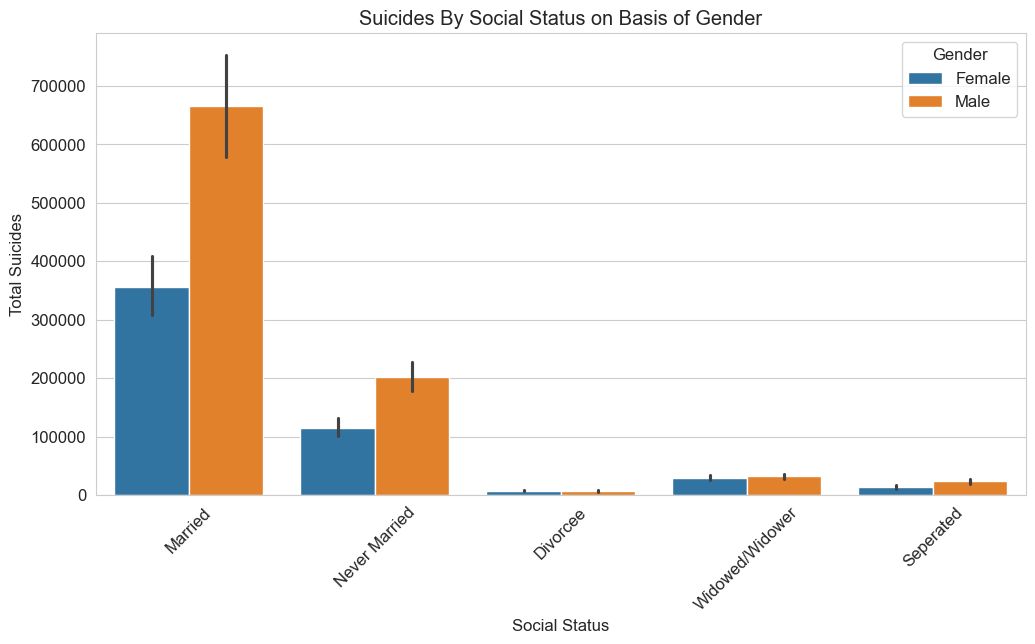

In [20]:
# Filtering the data according to 'Type_code' for Social Status
social_status_df = statewise_df[statewise_df['Type_code'] == 'Social_Status']

# Plotting the data
plt.figure(figsize=(12, 6))
sns.barplot(x='Type', y='Total', hue='Gender', data=social_status_df, estimator=sum)
plt.title('Suicides By Social Status on Basis of Gender')
plt.xlabel('Social Status')
plt.ylabel('Total Suicides')
plt.xticks(rotation=45)
plt.show()

Age_group
0-14      9639
15-29    24960
30-44    24064
45-59    19730
60+      13766
Name: count, dtype: int64


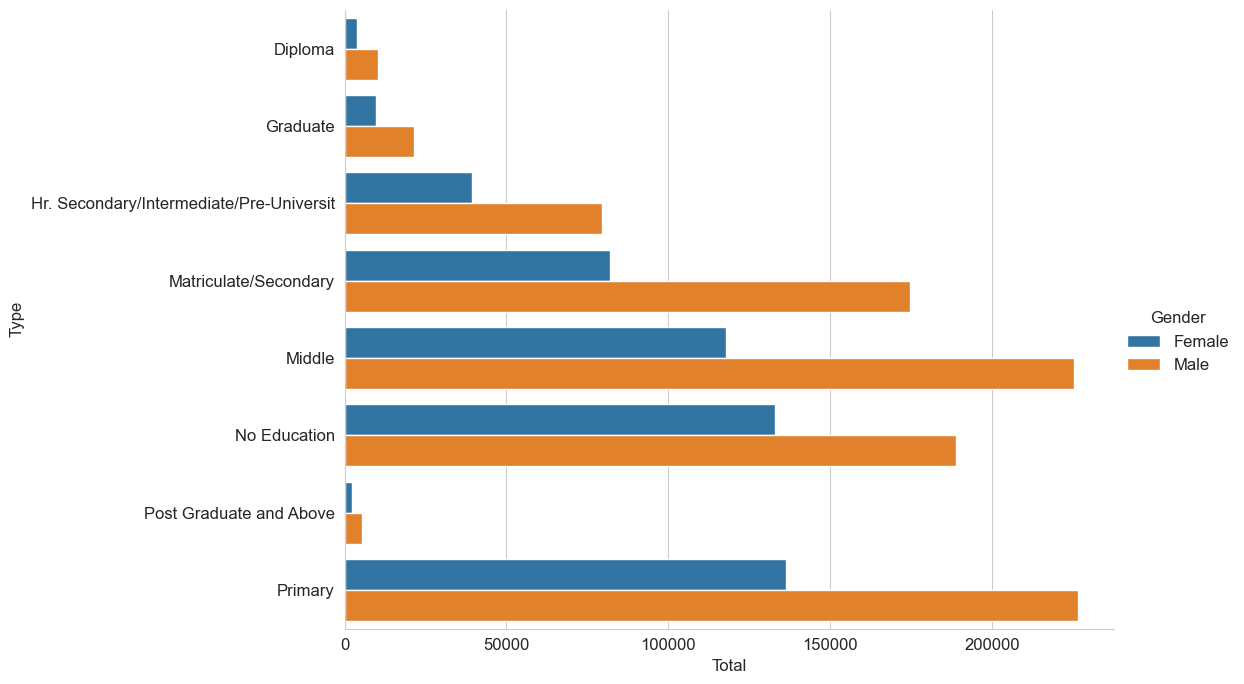

<Figure size 1200x600 with 0 Axes>

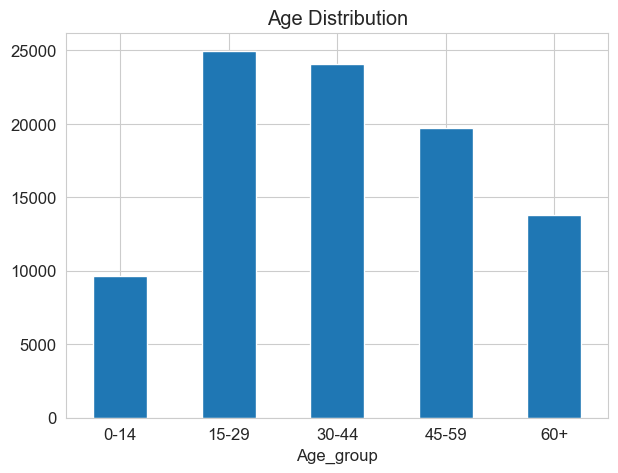

In [24]:
#Age Distributiion
statewise_Age_df = statewise_df.drop(statewise_df[statewise_df.Age_group == '0-100+'].index)

counts = statewise_Age_df['Age_group'].value_counts().sort_index()
print(counts)

counts.plot(kind='bar', title='Age Distribution',figsize=(7,5))
plt.xticks(rotation=0)
plt.show()

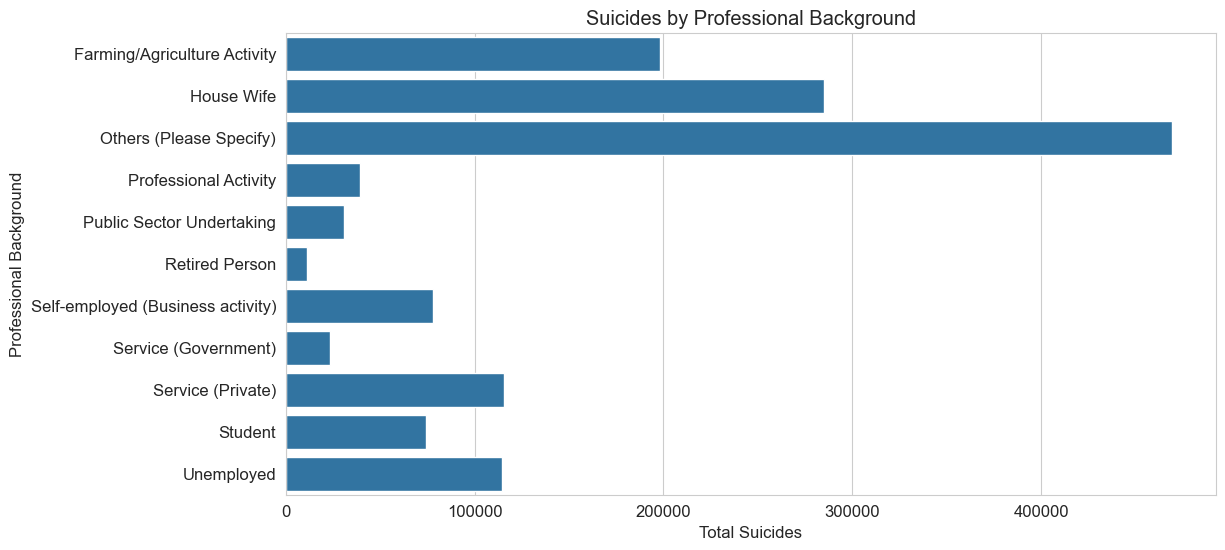

In [25]:
# Filtering the data according to 'Type_code' for Professional Profile
professional_profile_df = statewise_df[statewise_df['Type_code'] == 'Professional_Profile']

# Grouping the data by Type and summing the Total suicides
professional_profile_suicide = professional_profile_df.groupby("Type")["Total"].sum().reset_index()

# Plotting the data
plt.figure(figsize=(12, 6))
sns.barplot(x='Total', y='Type', data=professional_profile_suicide, estimator=sum)
plt.title('Suicides by Professional Background')
plt.xlabel('Total Suicides')
plt.ylabel('Professional Background')
plt.show()

In [27]:
filter_social_status = pd.DataFrame(statewise_df[statewise_df["Type_code"]=="Professional_Profile"].groupby(["Type","Gender"])["Total"].sum()).reset_index()
g = sns.catplot(x="Type", y="Total",hue="Gender", kind="bar", data=filter_social_status,height=7, aspect=11.7/7);
g.set_xticklabels(rotation=75);

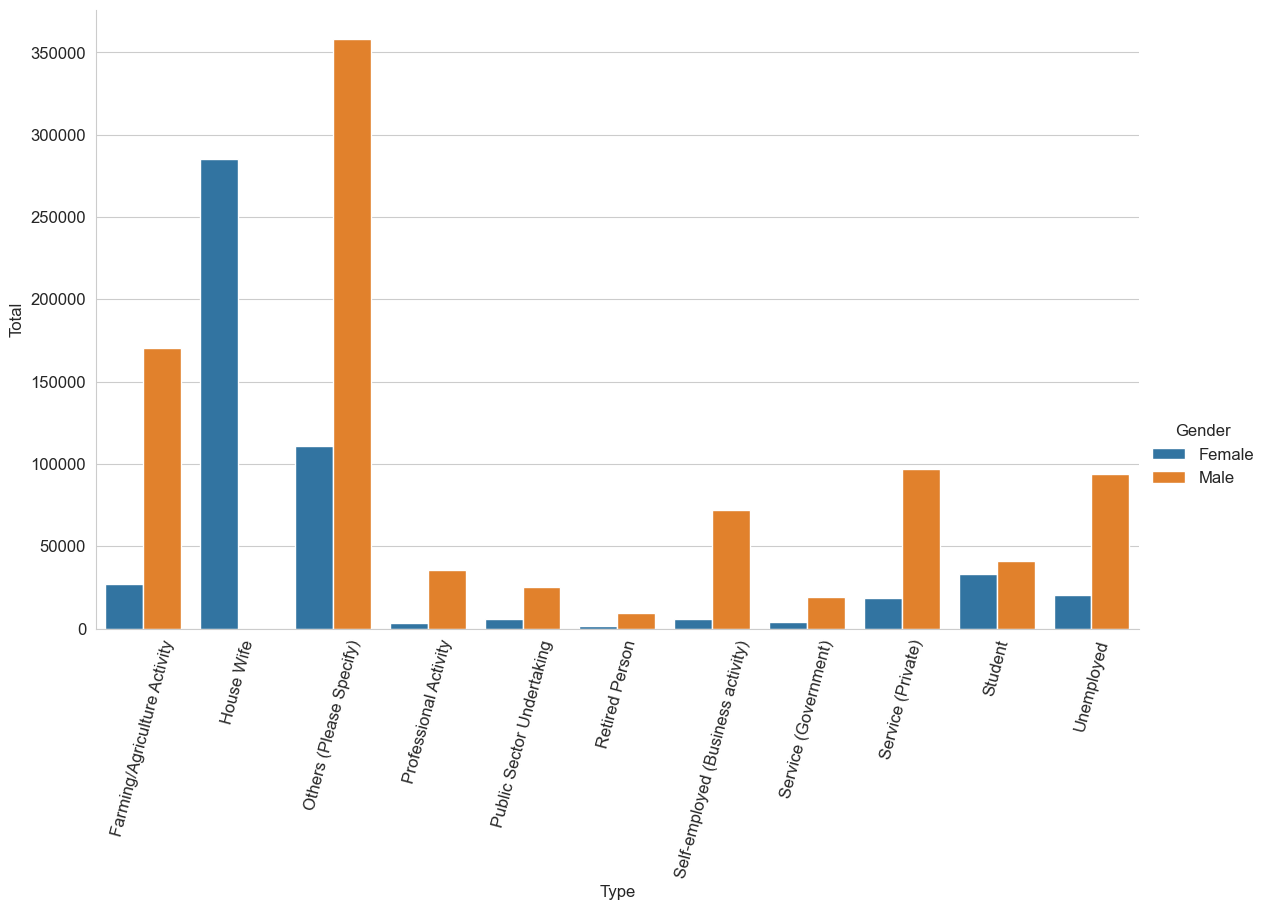

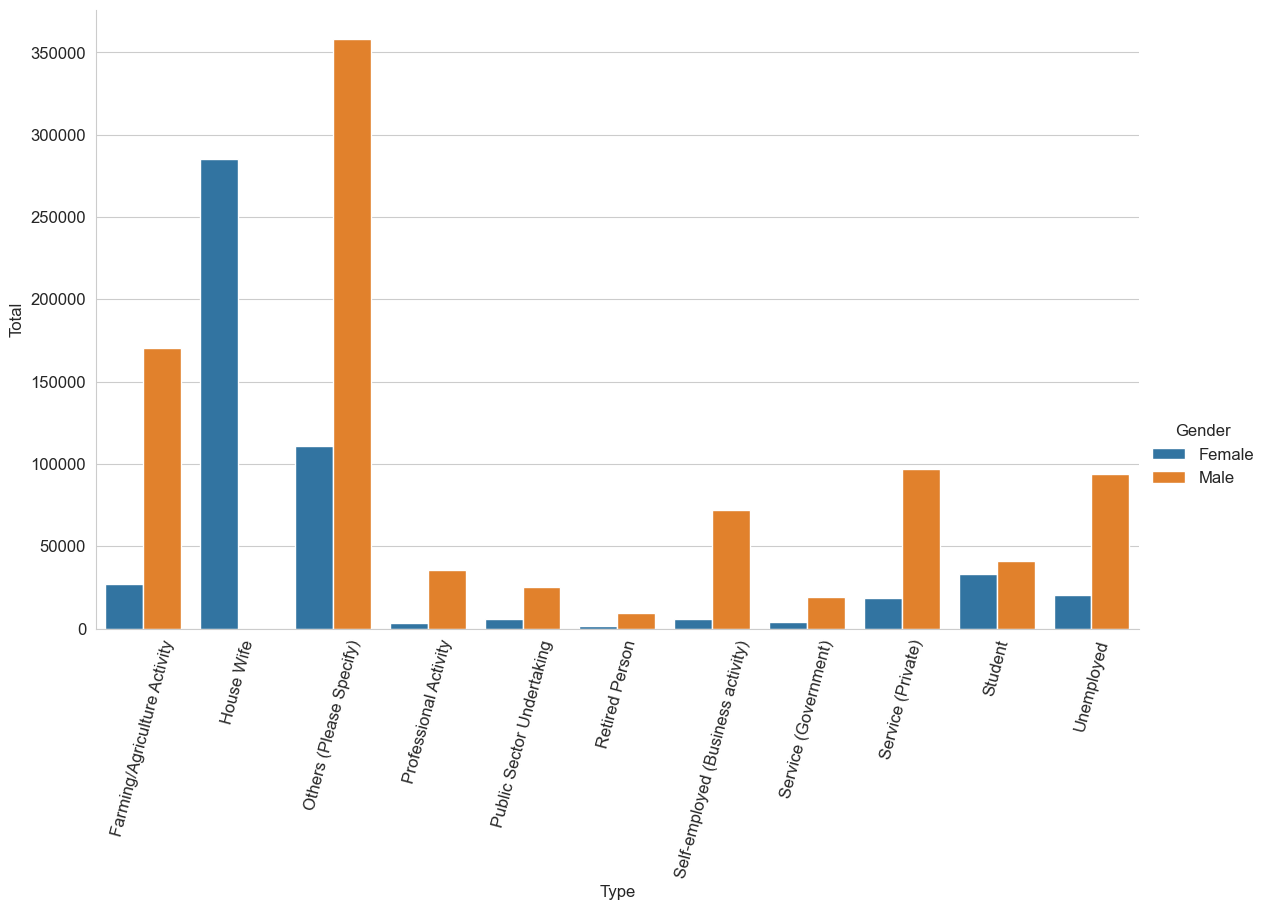

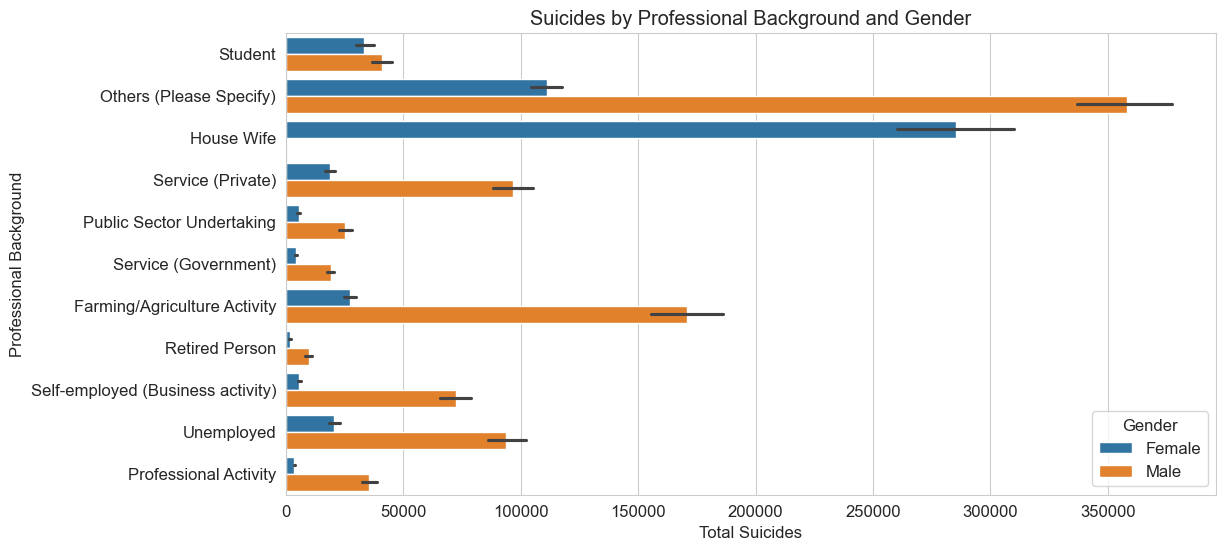

In [28]:
# Plotting the data
plt.figure(figsize=(12, 6))
sns.barplot(x='Total', y='Type', hue='Gender', data=professional_profile_df, estimator=sum)
plt.title('Suicides by Professional Background and Gender')
plt.xlabel('Total Suicides')
plt.ylabel('Professional Background')
plt.show()